## Nombre y apellidos

**Nombre:**

**Apellidos:**

### Cambiar el nombre del notebook a *Entrega2_ApellidosNombre.ipynb*

## -->*Importante comentar el código* <--

In [4]:
import zipfile as zp # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ejercicio 1: Police Dataset

**Carga el csv con los datos de la policía, y obtén la siguiente información:**

- 1. ¿Cuáles fue el delito más común en 2005? ¿Y los dos delitos más comunes en 2012?
- 2. ¿Cuál ha sido el delito más común cada año desde que tenemos estadísticas?
- 3. ¿Cuál fue el mes de 2008 con más delitos?
- 4. ¿Cuáles fueron los dos delitos más comunes en 2012?
- 5. ¿Las infracciones Speeding y Equipment son más comunes entre hombres o mujeres? Explica tu respuesta
- 6. Obtén la media de la edad de los infractores por tipo de delito
- 7. ¿Cuál es el delito por el que es más común ser arrestado?
- 8. Plotea el gráfico que consideres más adecuado para analizar los diferentes delitos cometidos por hombres y mujeres.
- 9. Plotea en el gráfico que consideres más apropiado la proporción (porcentaje) de cada tipo de delito (un gráfico por cada año)
- 10. Plotea el gráfico que consideres más adecuado para ver la evolución en el tiempo del número de delitos de Speeding, Moving violation y Equipment

In [5]:
police = pd.read_csv('../datasets/police.csv')#Multas
police.head()
#police.driver_race.unique()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
#1 
def violations_by_year(year):
    col_year = police['stop_date'].str.split("/").str[2] # split and get only year
    police_year = police[col_year == year] # filter using year
    police_group = police_year.groupby(["violation"]).count() # group by violations this year
    police_violation = police_group.sort_values("stop_date", ascending=False).head(1) # sort in desc. order and get first
    return police_violation["stop_date"].keys()[0]

print("In 2005 -> ", violations_by_year("2005"))
print("In 2012 -> in exercice 4")

In 2005 ->  Speeding
In 2012 -> in exercice 4


In [30]:
#2
#police['year'] = police ['stop_date'].str[-4:]
col_year = police['stop_date'].str.split("/").str[2]
police.groupby([col_year, "violation_raw"])['violation_raw'].value_counts()


stop_date  violation_raw                     violation_raw                   
2005       APB                               APB                                    5
           Call for Service                  Call for Service                      26
           Equipment/Inspection Violation    Equipment/Inspection Violation       170
           Motorist Assist/Courtesy          Motorist Assist/Courtesy              18
           Other Traffic Violation           Other Traffic Violation              384
                                                                                 ... 
2012       Seatbelt Violation                Seatbelt Violation                     3
           Special Detail/Directed Patrol    Special Detail/Directed Patrol       330
           Speeding                          Speeding                            4174
           Suspicious Person                 Suspicious Person                      6
           Violation of City/Town Ordinance  Violation of City

In [ ]:
#3
police_year = police[police['stop_date'].str.split("/").str[2] == "2008"] # filter using year == 2008
col_month = police_year['stop_date'].str.split("/").str[0]; # split and get only month
police_group = police_year.groupby(col_month).size().sort_values(axis=0, ascending=False) # count rows per month and sort
print(police_group.keys) # all month sorted
police_group.keys()[0] # first month

In [ ]:
# 4
col_year = police['stop_date'].str.split("/").str[2]; # split and get only year
police_year = police[col_year == '2012'] # filter using year
police_group = police_year.groupby(["violation"]).count() # group by violations this year
police_violation = police_group.sort_values("stop_date", ascending=False).head(2) # sort in desc. order and get first
police_violation["stop_date"].keys()

In [ ]:
#5
speeding = police[(police["violation"] == "Speeding") | (police["violation"] == "Equipment")]
gender = speeding.groupby("driver_gender").size()
gender

In [27]:
#6
police.groupby('violation_raw').mean()['driver_age']

violation_raw
APB                                 35.588235
Call for Service                    31.483871
Equipment/Inspection Violation      31.278723
Motorist Assist/Courtesy            32.888889
Other Traffic Violation             33.180791
Registration Violation              31.550725
Special Detail/Directed Patrol      40.133333
Speeding                            30.543796
Suspicious Person                   31.153846
Violation of City/Town Ordinance    31.090909
Warrant                             32.800000
Name: driver_age, dtype: float64

In [45]:
#7
police_arrested = police[police['is_arrested'] == True]

police_arrested.groupby('violation_raw').size().sort_values(ascending=False).head(1)

violation_raw
Other Traffic Violation    710
dtype: int64

[]

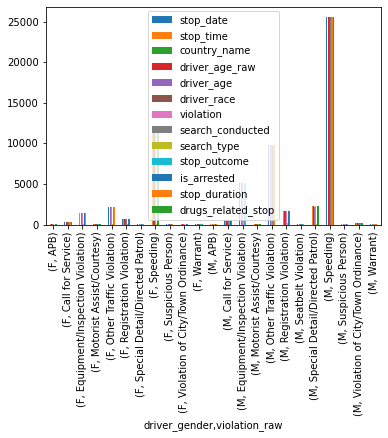

In [9]:
#8
police.groupby(['driver_gender', 'violation_raw']).count().plot(kind = 'bar').plot(kind = "bar", subplot = True)


<AxesSubplot:xlabel='stop_date'>

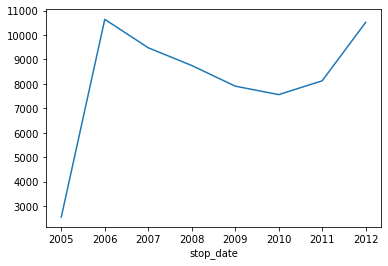

In [17]:
#9
col_year = police['stop_date'].str.split("/").str[2]

police.groupby([col_year, 'violation_raw']).size().plot()#Hacer por enrejado

### Ejercicio 2: Covid Dataset

**Carga el csv con los datos covid, y obtén la siguiente información:**

- 1. ¿Cúal es la región con más casos confirmados?¿y con menos?
- 2. ¿Cuál es la región con mayor proporción de muertos con respecto a casos confirmados?
- 3. Plotea una figura con tres gráficos para estudiar la evolución en el tiempo de casos confirmados, muertos y recuperados por país en los siguientes países: España, Italia y Alemania. Tiene que haber un gráfico por país. 

In [88]:
covid = pd.read_csv('../datasets/covid19.csv')#Multas
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [126]:
#1
covid.groupby('Region')['Confirmed'].sum().sort_values(ascending = True).head(1)
covid.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

In [ ]:
#2

### Ejercicio 3: MovieLens Dataset

**Carga el csv con los datos de MovieLens y completa las tareas que se piden:**


In [132]:
# descargar del dataset MovieLens 
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'  
local_zip = os.path.join("../datasets", "ml-1m.zip")
urllib.request.urlretrieve(url, local_zip)
# para descomprimir un archivo zip
with zp.ZipFile(local_zip, 'r') as zipp: 
    print('Extracting all files...') 
    zipp.extractall(os.path.join("datasets")) # donde se guarda
    print('Done!') 

Extracting all files...
Done!


In [133]:
root_path = os.path.join("datasets", "ml-1m" )

ratings = pd.read_csv(os.path.join(root_path, "ratings.dat"), sep='::',
                                index_col=0, engine='python',
                                names=['UserID','MovieID','Rating','Timestamp'])

users = pd.read_csv(os.path.join(root_path, "users.dat"),sep='::',
                              index_col=0, engine='python',
                              names=['UserID','Gender','Age','Occupation','Zip-code'])

In [134]:
ratings

,MovieID,Rating,Timestamp
UserID,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746


In [135]:
users

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


#### 3.1. Combina los datasets de ratings y users, en un dataset llamado all_dataset, cruzando por una columna común y comprueba que se ha hecho bien el cruce. Con ese dataset crea una pivot table a partir de la tabla Ratings para calcular la media y el total de ratings por  y género y ocupación

¿merge, join, concat? ¿left,right, inner?

In [147]:
all_dataset = pd.merge(ratings, users, left_index=True, right_index = True)
all_dataset

,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
UserID,,,,,,,
1,1193,5,978300760,F,1,10,48067
1,661,3,978302109,F,1,10,48067
1,914,3,978301968,F,1,10,48067
1,3408,4,978300275,F,1,10,48067
1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...
6040,1091,1,956716541,M,25,6,11106
6040,1094,5,956704887,M,25,6,11106
6040,562,5,956704746,M,25,6,11106


#### Pivot Tables
- Representar los datos en función a varios parámetros, agregando
```python
pivot_table(<lista de valores>, index=<agregador primario>, columns=<agregador secundario>)
```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Ejemplo:

In [ ]:
all_dataset.pivot_table('Rating', index='Gender', columns='Age', aggfunc='count')

In [180]:
all_dataset.pivot_table('Rating', index='Occupation', columns='Gender', aggfunc='count').sum()

Gender
F    246440
M    753769
dtype: int64

In [181]:
all_dataset.pivot_table('Rating', index='Occupation', columns='Gender', aggfunc='count').mean()

Gender
F    11735.238095
M    35893.761905
dtype: float64

#### 3.2. Dado el dataset de géneros únelo con el dataset original (movies) encuentra:

- Comedias de 1975
- Películas del oeste de 1980
- Género del que se produjeron más películas a lo largo de cada uno de los años de la década de los 80s

In [36]:
movies = pd.read_csv(os.path.join(root_path, "movies.dat"),sep='::', engine='python',names=['MovieID','Title','Genre'])
movies

NameError: name 'root_path' is not defined

In [35]:
all_genres = movies['Genre'].apply(lambda x : x.split('|'))
print(all_genres)

# print([genre for x in all_genres for genre in x])

genres = pd.unique([genre for x in all_genres for genre in x])
print(genres)

NameError: name 'movies' is not defined

In [200]:
# crear tabla con columnas por género
zeros = np.zeros( (len(movies), len(genres)) )
genres_frame = pd.DataFrame(zeros, columns=genres)


enres_frame.columns # lista de generos (columnas)
# para cada película, marcar género con 1
for i, genre in enumerate(movies['Genre']):
    inds = columns_genres.get_indexer(genre.split('|')) # retorna los indices correspondientes a los generos de cada pelicula
    genres_frame.iloc[i,inds] = 1 # localiza las columnas del genero correspondiente, marca con 1
genres_frame

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
#1
moviess = movies.loc[movies['Title'].str.contains("1975")].loc[movies['Genre'].str.contains('Comedy')]
moviess

,MovieID,Title,Genre
994,1007,"Apple Dumpling Gang, The (1975)",Children's|Comedy|Western
2170,2239,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
2588,2657,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi
3030,3099,Shampoo (1975),Comedy|Romance
3293,3362,Dog Day Afternoon (1975),Comedy|Crime|Drama
3745,3814,Love and Death (1975),Comedy


In [197]:
moviesss = movies.loc[movies['Title'].str.contains("1980")].loc[movies['Genre'].str.contains('Western')]
moviesss

,MovieID,Title,Genre


In [34]:
moviessss = movies.loc[movies['Title'].str.contains("198")]
moviessss = pd.merge(moviessss, genres_frame, left_index=True, right_index = True)
moviessss



NameError: name 'movies' is not defined